<a href="https://colab.research.google.com/github/kumarnitish378/AISA_TheVirtualFriend/blob/master/alphabate_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import cv2
from random import randint, random
from scipy import signal
np.random.seed(5)

size = (64, 64, 3)


In [5]:
import matplotlib.pyplot as plt

In [6]:
from random import choice

In [101]:
alpha = [ i for i in "abcdefghijklmnopqrstuvwxyz"]

In [102]:
choice(alpha)

'q'

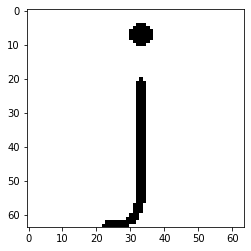

In [103]:
xtrain = []
ytrain = []
for i in range(10000):
    flag = randint(0,1)

    stx = randint(0, 30)
    sty = randint(35, 60)

    org = (stx, sty)
    color = (randint(2, 5), randint(2, 5), randint(2, 5))
    thickness = 2 #randint(2, 5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 2 # randint(1,5)
    text = choice(alpha)
    # print(text)

    img = np.ones(size)*255
    img = cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    img_float32 = np.float32(img)
    gray = cv2.cvtColor(img_float32, cv2.COLOR_BGR2GRAY)
    # print(gray.shape)
    kernal = np.random.random((3,3))
    if flag == 1:
        gray = signal.convolve2d(gray, kernal, "same")
        # print("CNVo")
    xtrain.append(gray)
    ytrain.append(alpha.index(text))
    # cv2.imwrite("/content/test/{}_{}.png".format(i, text), gray)

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
plt.imshow(gray, cmap='gray')

In [104]:
alpha.index("Q")

ValueError: ignored

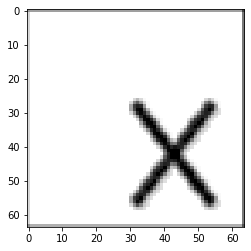

In [105]:
xtest = []
ytest = []
for i in range(1000):
    flag = randint(0,1)

    stx = randint(0, 30)
    sty = randint(30, 60)

    org = (stx, sty)
    color = (randint(2, 5), randint(2, 5), randint(2, 5))
    thickness = 2 #randint(2, 5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 2 # randint(1,5)
    text = choice(alpha)
    # print(text)

    img = np.ones(size)*255
    img = cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    img_float32 = np.float32(img)
    gray = cv2.cvtColor(img_float32, cv2.COLOR_BGR2GRAY)
    # print(gray.shape)
    kernal = np.random.random((3,3))
    if flag == 1:
        gray = signal.convolve2d(gray, kernal, "same")
        # print("CNVo")
    xtest.append(gray)
    ytest.append(alpha.index(text))
    # cv2.imwrite("/content/test/{}_{}.png".format(i, text), gray)

xtest = np.array(xtest)
ytest = np.array(ytest)
plt.imshow(gray, cmap='gray')

In [106]:
xtrain, xtest = xtrain/255, xtest/255

In [107]:
xtrain.shape

(10000, 64, 64)

# Deep Learning Model

In [108]:
import tensorflow as tf

In [109]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(128, [3, 3], activation='relu', input_shape=(64,64,1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    # model.add(tf.keras.layers.Conv2D(32, [2, 2], activation='relu'))
    # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # model.add(tf.keras.layers.Dropout(0.15))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(26, activation='softmax'))
    return model


model = create_classical_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 128)       1280      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 12544)            

In [123]:
history = model.fit(xtrain, ytrain, epochs=50, batch_size=12, validation_data=(xtest, ytest))

Epoch 1/50
834/834 [==============================] - 5s 6ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.9569 - val_accuracy: 0.9040
Epoch 2/50
834/834 [==============================] - 5s 6ms/step - loss: 0.0165 - accuracy: 0.9936 - val_loss: 1.3052 - val_accuracy: 0.9050
Epoch 3/50
834/834 [==============================] - 5s 6ms/step - loss: 0.0444 - accuracy: 0.9876 - val_loss: 1.1221 - val_accuracy: 0.9100
Epoch 4/50
834/834 [==============================] - 5s 6ms/step - loss: 0.0402 - accuracy: 0.9885 - val_loss: 0.8748 - val_accuracy: 0.9090
Epoch 5/50
834/834 [==============================] - 5s 6ms/step - loss: 0.0421 - accuracy: 0.9886 - val_loss: 1.1317 - val_accuracy: 0.9030
Epoch 6/50
834/834 [==============================] - 5s 6ms/step - loss: 0.0200 - accuracy: 0.9926 - val_loss: 1.1110 - val_accuracy: 0.9090
Epoch 7/50
834/834 [==============================] - 5s 6ms/step - loss: 0.0248 - accuracy: 0.9915 - val_loss: 1.2723 - val_accuracy: 0.9090
Epoch 

In [124]:
model.evaluate(xtest, ytest)

32/32 [==============================] - 0s 6ms/step - loss: 1.4543 - accuracy: 0.9110


[1.454258680343628, 0.9110000133514404]

In [125]:
model.save("alpha_pred_v91.h5")

In [126]:
pred = model.predict(xtest)

In [127]:
ch = np.argmax(pred[10])
ch

4

In [128]:
alpha[ch]

'e'

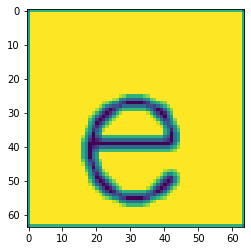

In [129]:
plt.imshow(xtest[10])

# Confusion Matrix

In [130]:
y_pred = y_pred = [alpha[np.argmax(i)] for i in pred] 

In [131]:
y_test = [alpha[i] for i in ytest] 

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [133]:
M = confusion_matrix(y_test, y_pred)

In [134]:
import seaborn as  sns

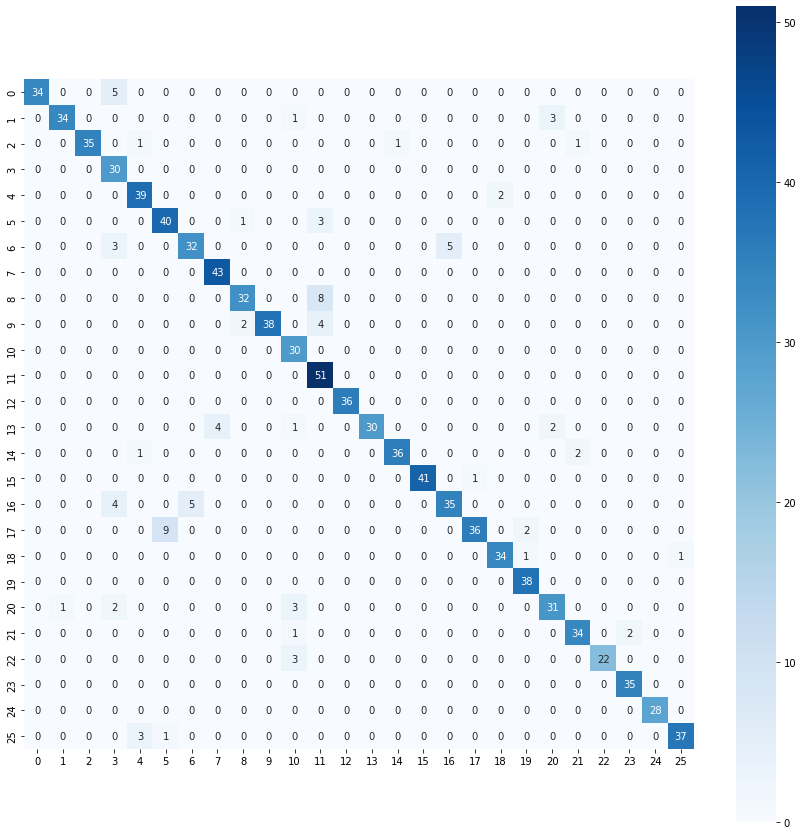

In [135]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, )